# Hello Entangled World

### Importing all the Necessary qiskit libraries

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

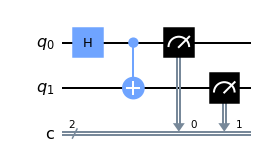

In [2]:
circ_bell = QuantumCircuit(2,2)

#we have a two Qubit and two classical bit circuit

circ_bell.h(0)

#then we apply the haadmard gate on the first qubit

circ_bell.cx(0,1)

#now we apply the controlled not gate which have control on the
#first qubit and target on the second qubit

circ_bell.measure(range(2),range(2))

#here we do the measurement on both the states


circ_bell.draw(output='mpl')

#we draw the circuit

## Executing on the qasm simulator

In [3]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_bell, backend, shots = 1024)


counts = job.result().get_counts()

In [4]:
print(counts)

{'00': 534, '11': 490}


It tells us out of the total number of shots we sent, how many were the |00> states and how many were the |11> state

## Finding the State Vector Amplitude

In [5]:
circ_bell2 = QuantumCircuit(2)
circ_bell2.h(0)
circ_bell2.cx(0,1)



backend = Aer.get_backend('statevector_simulator')
job = execute(circ_bell2, backend)


state = job.result().get_statevector()



for i in range(4):
    s = format(i,"b")
    #converting to binary
    s = (2-len(s))*"0"+s
    #prepend zeroes
    
    print("Amplitude of",s,"=",state[i])
    
print()

Amplitude of 00 = (0.7071067811865476+0j)
Amplitude of 01 = 0j
Amplitude of 10 = 0j
Amplitude of 11 = (0.7071067811865476+0j)



## Finding the Probabilities

In [6]:
for i in range(4):
    s = format(i,"b")
    #converting to binary
    s = (2-len(s))*"0"+s
    #prepend zeroes
    
    print("Probability of",s,"=",abs(state[i])**2)

Probability of 00 = 0.5000000000000001
Probability of 01 = 0.0
Probability of 10 = 0.0
Probability of 11 = 0.5000000000000001


### Details about all the Devices available to us

In [7]:
provider = IBMQ.load_account()
backend_overview()

C:\Users\Monit Sharma\Documents\Anaconda\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 25             Pending Jobs: 32             Pending Jobs: 22
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      107.7          Avg. T1:      79.0           Avg. T1:      184.7
Avg. T2:      89.9           Avg. T2:      95.6           Avg. T2:      195.4



ibmq_valencia               ibmq_ourense                 ibmq_vigo
-------------               ------------                 ---------
Num. Qubits:  5             Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0             Pending Jobs: 1290           Pending Jobs: 533
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operationa

In [8]:
backend_monitor(provider.get_backend("ibmq_armonk"))

ibmq_armonk
Configuration
-------------
    n_qubits: 1
    operational: True
    status_msg: active
    pending_jobs: 23
    backend_version: 1.1.3
    basis_gates: ['id', 'u1', 'u2', 'u3']
    local: False
    simulator: False
    dynamic_reprate_enabled: False
    meas_kernels: ['hw_boxcar']
    sample_name: SPARROW
    discriminators: ['linear_discriminator', 'quadratic_discriminator']
    backend_name: ibmq_armonk
    max_shots: 8192
    url: None
    n_uchannels: 0
    supported_instructions: ['setf', 'measure', 'x', 'cx', 'id', 'u2', 'shiftf', 'acquire', 'u1', 'delay', 'u3', 'play']
    meas_lo_range: [[6.493427855, 7.493427855]]
    n_registers: 1
    conditional_latency: []
    quantum_volume: None
    meas_map: [[0]]
    coupling_map: None
    rep_times: [1000.0]
    conditional: False
    qubit_channel_mapping: [['m0', 'd0']]
    u_channel_lo: []
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    qubit_lo_range: [[4.474446855948306, 5.474446855948

### Getting the least Busy Quantum Computer for our Work

In [9]:
from qiskit.providers.ibmq import least_busy


In [10]:
backend= least_busy(provider.backends(operational=True, simulator=False, status_msg='active',filters=lambda x: x.configuration().n_qubits >1))

print("We are executing on....", backend)

print("It has ",backend.status().pending_jobs,"pending jobs")

job_exp = execute(circ_bell, backend= backend)

job_monitor(job_exp)

We are executing on.... ibmq_valencia
It has  1 pending jobs
Job Status: job has successfully run


## Plotting the Results

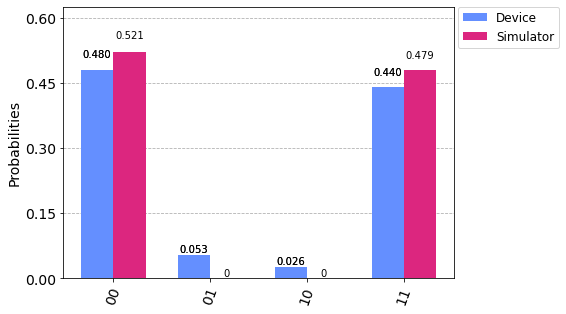

In [11]:
result_exp = job_exp.result()

counts_exp = result_exp.get_counts(circ_bell)

plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])